<a href="https://colab.research.google.com/github/dandiputra2/Tugas5DataMining/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Social_Network.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values

In [3]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1])

In [6]:
X

array([[     19,  190000],
       [     35,  200000],
       [     26,   43000],
       [     27,   57000],
       [     19,   76000],
       [     27,   58000],
       [     27,   84000],
       [     32,  150000],
       [     25,   33000],
       [     35,   65000],
       [     26,   80000],
       [     26,   52000],
       [     20,   86000],
       [     32,   18000],
       [     18,   82000],
       [     29,   80000],
       [     47,   25000],
       [     45,   26000],
       [     46,   28000],
       [     48,   29000],
       [     45,   22000],
       [     47,   49000],
       [     48,   41000],
       [     45,   22000],
       [     46,   23000],
       [     47,   20000],
       [     49,   28000],
       [     47,   30000],
       [     29,   43000],
       [     31,   18000],
       [     31,   74000],
       [     27,  137000],
       [     21,   16000],
       [     28,   44000],
       [     27,   90000],
       [     35,   27000],
       [     33,   28000],
 

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [8]:
X_test

array([[    31,  18000],
       [    19,  76000],
       [    49,  28000],
       [    31,  74000],
       [    21,  16000],
       [    30,  49000],
       [    27,  90000],
       [    27,  17000],
       [    32, 150000],
       [    26,  80000],
       [    26,  52000],
       [    27, 137000],
       [    28,  44000]])

In [9]:
y_test

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0])

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
X_train

array([[ 1.41954688, -0.42907721],
       [-0.39037539,  4.28422583],
       [-0.81623946, -0.38265832],
       [-0.92270547,  2.28464273],
       [ 1.31308087, -0.43621858],
       [-0.49684141, -0.250543  ],
       [-0.49684141, -0.38265832],
       [ 1.5260129 , -0.38979968],
       [ 1.41954688, -0.44693063],
       [-0.07097734, -0.35409284],
       [ 1.20661485, -0.45764268],
       [ 0.14195469, -0.15056385],
       [-0.92270547, -0.41836516],
       [-0.17744336, -0.47192542],
       [ 1.41954688, -0.46478405],
       [-0.70977344, -0.32909805],
       [ 1.20661485, -0.44335995],
       [ 0.14195469, -0.43978926],
       [-1.66796759, -0.24340163],
       [-0.81623946, -0.27910848],
       [ 0.14195469,  0.17793909],
       [-1.45503555, -0.2291189 ],
       [-0.39037539, -0.48263747],
       [ 1.31308087, -0.454072  ],
       [-0.70977344, -0.23626027],
       [ 1.20661485, -0.45764268],
       [-0.07097734, -0.43621858],
       [ 1.41954688, -0.36123421],
       [ 1.5260129 ,

In [12]:
y_test

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0])

In [13]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [14]:
y_pred = classifier.predict(X_test)

In [15]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [16]:
y_test

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0])

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[9 0]
 [3 1]]


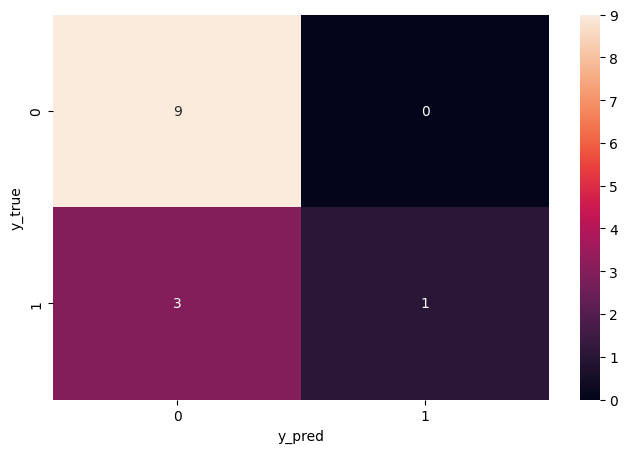

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [19]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         9
           1       1.00      0.25      0.40         4

    accuracy                           0.77        13
   macro avg       0.88      0.62      0.63        13
weighted avg       0.83      0.77      0.72        13



<ipython-input-20-d7d0aff4f93e>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


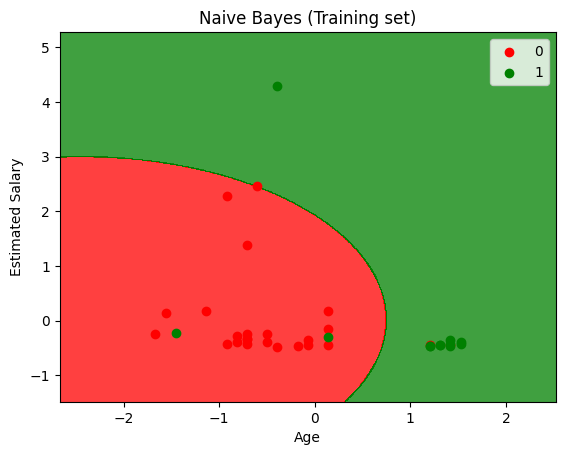

In [20]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

<ipython-input-21-f49f6daa79b6>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


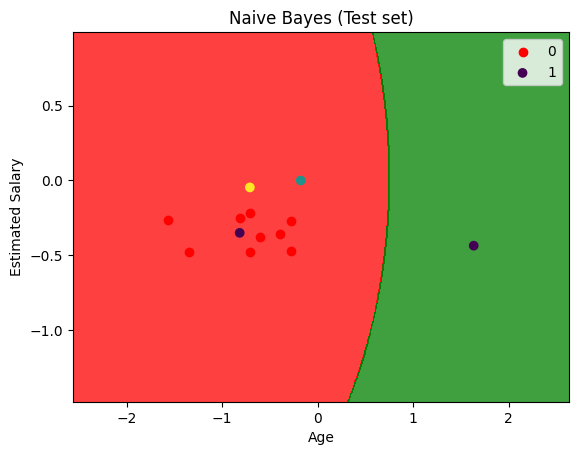

In [21]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()